In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True})

In [2]:
def integrate_euler(f, y0, t0, t1, h):
    t = np.arange(t0, t1, h)
    # print(t)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h*f(t[i-1], y[i-1])
    return t, y

def integrate_midpoint(f, y0, t0, t1, h):
    t = np.arange(t0, t1, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + h*f(t[i-1] + h/2, y[i-1] + h/2*f(t[i-1], y[i-1]))
    return t, y

def integrate_rk4(f, y0, t0, t1, h):
    t = np.arange(t0, t1, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2*k1)
        k3 = f(t[i-1] + h/2, y[i-1] + h/2*k2)
        k4 = f(t[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

In [53]:
def f(t, y):
    return np.cos(t)

y0 = np.array([0])
t0 = 0
t1 = 10

ts0, y_euler_0 = integrate_euler(f, y0, t0, t1, 1.0)
ts1, y_euler_1 = integrate_euler(f, y0, t0, t1, 0.1)
ts2, y_euler_2 = integrate_euler(f, y0, t0, t1, 0.01)
ts3, y_euler_3 = integrate_euler(f, y0, t0, t1, 0.001)

ts0, y_midpoint_0 = integrate_midpoint(f, y0, t0, t1, 1.0)
ts1, y_midpoint_1 = integrate_midpoint(f, y0, t0, t1, 0.1)
ts2, y_midpoint_2 = integrate_midpoint(f, y0, t0, t1, 0.01)
ts3, y_midpoint_3 = integrate_midpoint(f, y0, t0, t1, 0.001)

ts0, y_rk4_0 = integrate_rk4(f, y0, t0, t1, 1.0)
ts1, y_rk4_1 = integrate_rk4(f, y0, t0, t1, 0.1)
ts2, y_rk4_2 = integrate_rk4(f, y0, t0, t1, 0.01)
ts3, y_rk4_3 = integrate_rk4(f, y0, t0, t1, 0.001)

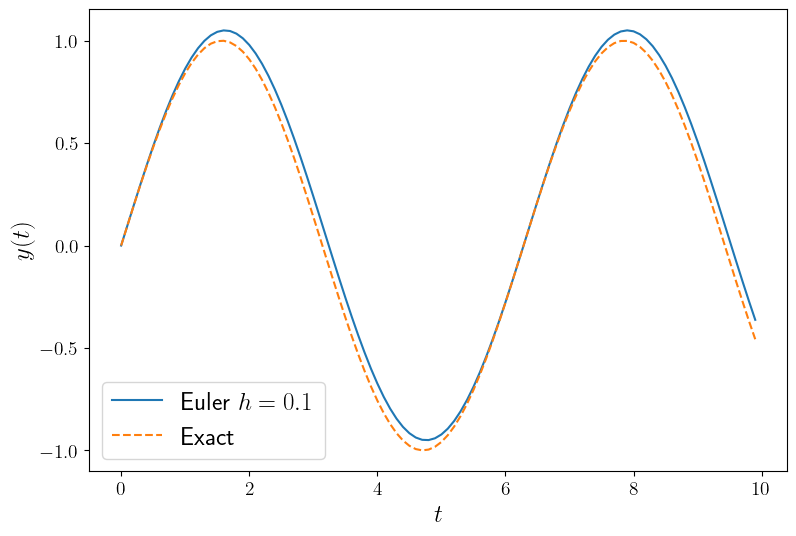

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

plt.plot(ts1, y_euler_1, label='Euler $h=0.1$')
plt.plot(ts1, np.sin(ts1), label='Exact', linestyle='--')
# ax = plt.gca()
ax.legend(fontsize=18)
ax.set_ylabel('$y(t)$', fontsize=18)
ax.set_xlabel('$t$', fontsize=18)
ax.tick_params(labelsize=14)

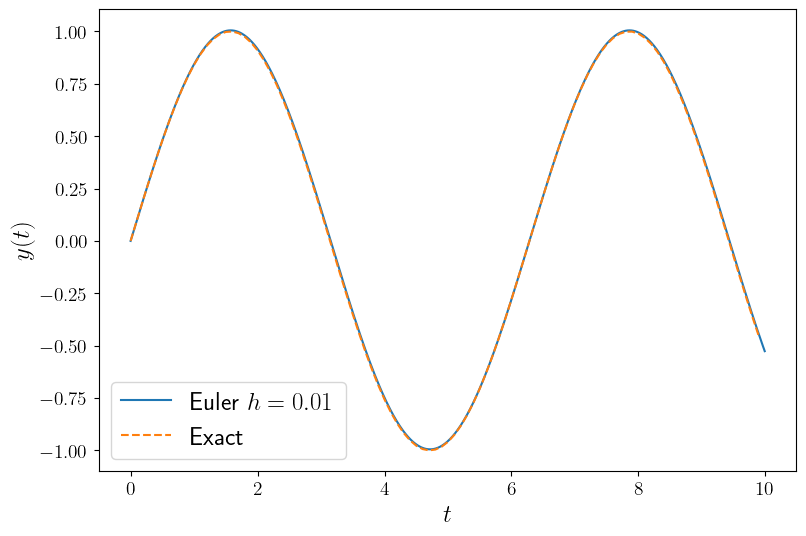

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

plt.plot(ts2, y_euler_2, label='Euler $h=0.01$')
plt.plot(ts1, np.sin(ts1), label='Exact', linestyle='--')
# ax = plt.gca()
ax.legend(fontsize=18)
ax.set_ylabel('$y(t)$', fontsize=18)
ax.set_xlabel('$t$', fontsize=18)
ax.tick_params(labelsize=14)

<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_886581/1776444569.py:18: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel('$\epsilon = |y(10) - \sin(10)|$', fontsize=18)


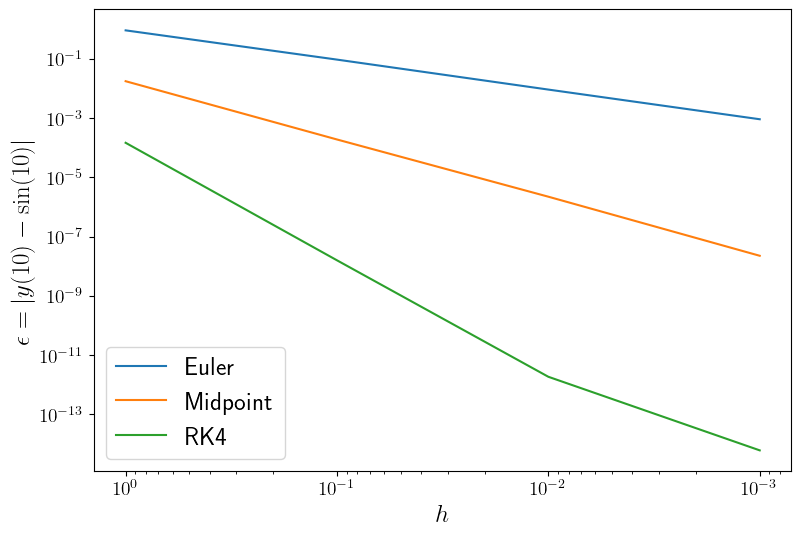

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

hs = np.array([1.0, 0.1, 0.01, 0.001])
# errors = [np.linalg.norm(y_euler_1 - np.sin(ts1)), np.linalg.norm(y_euler_2 - np.sin(ts2)), np.linalg.norm(y_euler_3 - np.sin(ts3)]
errors_euler = [abs(y_euler_0[-1] - np.sin(ts0[-1])), abs(y_euler_1[-1] - np.sin(ts1[-1])), abs(y_euler_2[-1] - np.sin(ts2[-1])), abs(y_euler_3[-1] - np.sin(ts3[-1]))]
errors_midpoint = [abs(y_midpoint_0[-1] - np.sin(ts0[-1])), abs(y_midpoint_1[-1] - np.sin(ts1[-1])), abs(y_midpoint_2[-1] - np.sin(ts2[-1])), abs(y_midpoint_3[-1] - np.sin(ts3[-1]))]
errors_rk4 = [abs(y_rk4_0[-1] - np.sin(ts0[-1])), abs(y_rk4_1[-1] - np.sin(ts1[-1])), abs(y_rk4_2[-1] - np.sin(ts2[-1])), abs(y_rk4_3[-1] - np.sin(ts3[-1]))]

ax.plot(hs, errors_euler, label='Euler')
plt.plot(hs, errors_midpoint, label='Midpoint')
plt.plot(hs, errors_rk4, label='RK4')
# plt.plot(ts1, y_euler_1, label='Euler $h=0.1$')
# plt.plot(ts1, np.sin(ts1), label='Exact', linestyle='--')
# ax = plt.gca()
ax.invert_xaxis()
ax.legend(fontsize=18)
ax.set_ylabel('$\epsilon = |y(10) - \sin(10)|$', fontsize=18)
ax.set_xlabel('$h$', fontsize=18)
ax.tick_params(labelsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

In [3]:
def f(t, y):
    u = y[0]
    v = y[1]
    return np.array([998 * u + 1998 * v, -999 * u - 1999 * v])

y0 = np.array([1, 0])
t0 = 0
t1 = 1

ts1, y_rk4_1 = integrate_rk4(f, y0, t0, t1, 2e-3)
ts2, y_rk4_2 = integrate_rk4(f, y0, t0, t1, 3e-3)

(0.0, 0.02)

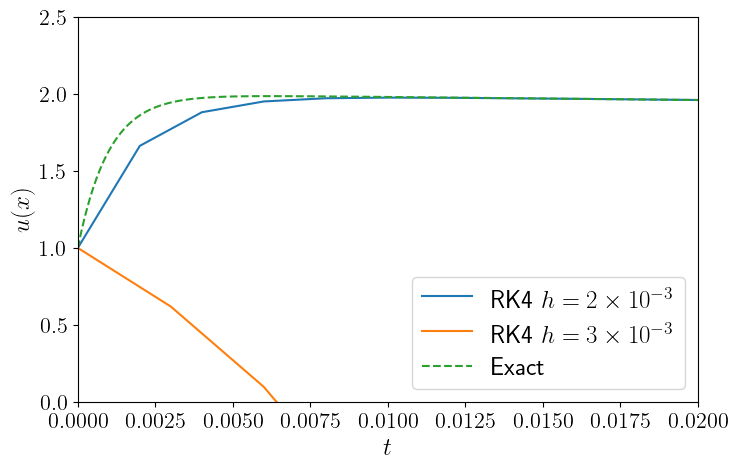

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.plot(ts1, y_rk4_1[:, 0], label='RK4 $h=2\\times 10^{-3}$')
plt.plot(ts2, y_rk4_2[:, 0], label='RK4 $h=3\\times 10^{-3}$')
ts3 = np.linspace(0, 1, 10000)
plt.plot(ts3, 2.0*np.exp(-ts3) - np.exp(-1000*ts3), label='Exact', linestyle='--')
# ax = plt.gca()
ax.legend(fontsize=18)
ax.set_ylabel('$u(x)$', fontsize=18)
ax.set_xlabel('$t$', fontsize=18)
ax.tick_params(labelsize=16)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 0.02)
# ax.set_title('u(x)', fontsize=18)

In [3]:
def implicit_euler(y0, t0, t1, h):
    t = np.arange(t0, t1, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = np.linalg.solve(np.eye(2) - h*np.array([[998, 1998], [-999, -1999]]), y[i-1])
    return t, y

(0.0, 1.0)

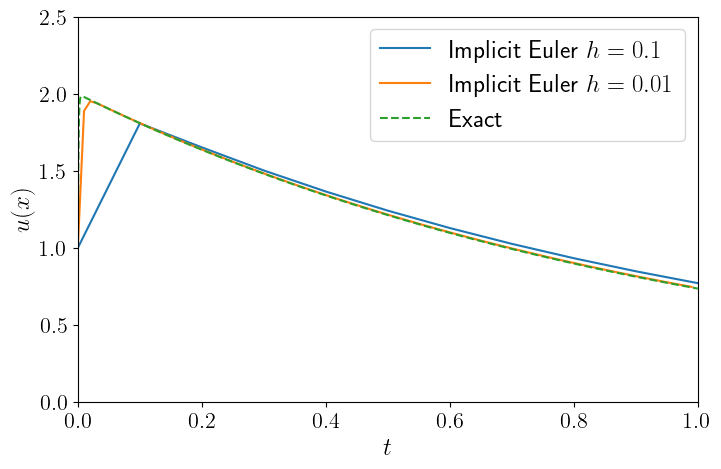

In [22]:
dt1 = 1e-1
ts1, y_implicit_euler_1 = implicit_euler(y0, t0, t1+1e-3, dt1)
dt2 = 1e-2
ts2, y_implicit_euler_2 = implicit_euler(y0, t0, t1, dt2)


fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.plot(ts1, y_implicit_euler_1[:, 0], label=f'Implicit Euler $h={dt1}$')
plt.plot(ts2, y_implicit_euler_2[:, 0], label=f'Implicit Euler $h={dt2}$')
# plt.plot(ts1, y_rk4_1[:, 0], label='RK4 $h=2\\times 10^{-3}$')
# plt.plot(ts2, y_rk4_2[:, 0], label='RK4 $h=3\\times 10^{-3}$')
ts3 = np.linspace(0, 1, 10000)
plt.plot(ts3, 2.0*np.exp(-ts3) - np.exp(-1000*ts3), label='Exact', linestyle='--')
# ax = plt.gca()
ax.legend(fontsize=18)
ax.set_ylabel('$u(x)$', fontsize=18)
ax.set_xlabel('$t$', fontsize=18)
ax.tick_params(labelsize=16)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1)

In [10]:
len(1.0)

TypeError: object of type 'float' has no len()

In [46]:
def newton_raphson(f, df, x0, tol=1e-10, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x = x - f(x)/df(x)
        if abs(f(x)) < tol:
            break
    return x

def fixed_point_iteration(f, x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        x = x - f(x)
        if abs(f(x)) < tol:
            break
    return x

def integrate_implicit_euler(f, df, y0, t0, t1, h):
    t = np.arange(t0, t1, h)
    y = np.zeros(len(t))
    y[0] = y0
    # n = len(y0)
    for i in range(1, len(t)):
        y[i] = newton_raphson(lambda x: x - y[i-1] - h*f(t[i], x), lambda x: 1 - h * df(t[i], x), y[i-1])
        # y[i] = fixed_point_iteration(lambda x: x - y[i-1] - h*f(t[i], x), y[i-1])
    return t, y

/tmp/ipykernel_886581/3980534792.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0] = y0


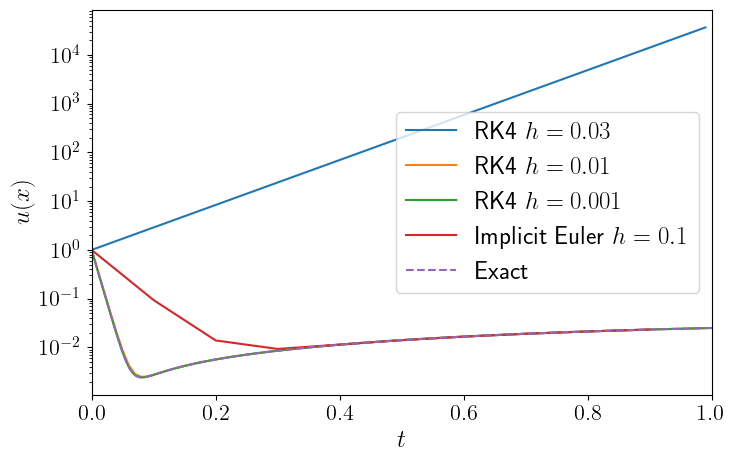

In [47]:
def f_stiff(t, y):
    return -100*y + 3*np.sin(t)

def df_dy(t, y):
    return -100

ts1, y_rk4_1 = integrate_rk4(f_stiff, np.array([1]), 0, 1, 0.03)
ts2, y_rk4_2 = integrate_rk4(f_stiff, np.array([1]), 0, 1, 0.01)
ts3, y_rk4_3 = integrate_rk4(f_stiff, np.array([1]), 0, 1, 0.001)
ts4, y_implicit_euler_1 = integrate_implicit_euler(f_stiff, df_dy, np.array([1]), 0, 1, 0.1)

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

plt.plot(ts1, y_rk4_1, label='RK4 $h=0.03$')
plt.plot(ts2, y_rk4_2, label='RK4 $h=0.01$')
plt.plot(ts3, y_rk4_3, label='RK4 $h=0.001$')
plt.plot(ts4, y_implicit_euler_1, label='Implicit Euler $h=0.1$')
# plt.plot(ts2, y_rk4_2[:, 0], label='RK4 $h=3\\times 10^{-3}$')
ts3 = np.linspace(0, 1, 10000)
plt.plot(ts3, 10004/10001*np.exp(-100*ts3)-3*np.cos(ts3)/10001+300*np.sin(ts3)/10001, label='Exact', linestyle='--')
# ax = plt.gca()
ax.legend(fontsize=18)
ax.set_ylabel('$u(x)$', fontsize=18)
ax.set_xlabel('$t$', fontsize=18)
ax.tick_params(labelsize=16)
# ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1)
# ax.set_xscale('log')
ax.set_yscale('log')